## **Credit Card Default Risk Modeling using Machine Learning**

### **Importing Data**

In [1]:
import pandas as pd
import numpy as np

In [2]:
credit_df = pd.read_csv("C:/Users/msi msi/OneDrive/Desktop/Power Bi credit card project/credit_card.csv")
customer_df = pd.read_csv("C:/Users/msi msi/OneDrive/Desktop/Power Bi credit card project/customer.csv")

In [3]:
credit_df.head()

,Client_Num,Card_Category,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,Week_Start_Date,Week_Num,Qtr,current_year,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Vol,Avg_Utilization_Ratio,Use Chip,Exp Type,Interest_Earned,Delinquent_Acc
0,708082083,Blue,200,0,87,01-01-2023,Week-1,Q1,2023,3544.0,1661,15149,111,0.469,Chip,Travel,4393.21,0
1,708083283,Blue,445,1,108,01-01-2023,Week-1,Q1,2023,3421.0,2517,992,21,0.736,Swipe,Entertainment,69.44,0
2,708084558,Blue,140,0,106,01-01-2023,Week-1,Q1,2023,8258.0,1771,1447,23,0.214,Chip,Bills,202.58,0
3,708085458,Blue,250,1,150,01-01-2023,Week-1,Q1,2023,1438.3,0,3940,82,0.000,Online,Grocery,236.40,0
4,708086958,Blue,320,1,106,01-01-2023,Week-1,Q1,2023,3128.0,749,4369,59,0.239,Swipe,Fuel,1004.87,1


In [4]:
customer_df.head()

,Client_Num,Customer_Age,Gender,Dependent_Count,Education_Level,Marital_Status,state_cd,Zipcode,Car_Owner,House_Owner,Personal_loan,contact,Customer_Job,Income,Cust_Satisfaction_Score
0,708082083,24,F,1,Uneducated,Single,FL,91750,no,yes,no,unknown,Businessman,202326,3
1,708083283,62,F,0,Unknown,Married,NJ,91750,no,no,no,cellular,Selfemployeed,5225,2
2,708084558,32,F,1,Unknown,Married,NJ,91750,yes,no,no,unknown,Selfemployeed,14235,2
3,708085458,38,M,2,Uneducated,Single,NY,91750,no,no,no,cellular,Blue-collar,45683,1
4,708086958,48,M,4,Graduate,Single,TX,91750,yes,yes,no,cellular,Businessman,59279,1


In [5]:
df = pd.merge(credit_df, customer_df, on='Client_Num', how='inner')

In [6]:
credit_df.shape

(10108, 18)

In [7]:
customer_df.shape

(10108, 15)

In [8]:
df.shape

(10108, 32)

In [9]:
df.head()

,Client_Num,Card_Category,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,Week_Start_Date,Week_Num,Qtr,current_year,Credit_Limit,...,Marital_Status,state_cd,Zipcode,Car_Owner,House_Owner,Personal_loan,contact,Customer_Job,Income,Cust_Satisfaction_Score
0,708082083,Blue,200,0,87,01-01-2023,Week-1,Q1,2023,3544.0,...,Single,FL,91750,no,yes,no,unknown,Businessman,202326,3
1,708083283,Blue,445,1,108,01-01-2023,Week-1,Q1,2023,3421.0,...,Married,NJ,91750,no,no,no,cellular,Selfemployeed,5225,2
2,708084558,Blue,140,0,106,01-01-2023,Week-1,Q1,2023,8258.0,...,Married,NJ,91750,yes,no,no,unknown,Selfemployeed,14235,2
3,708085458,Blue,250,1,150,01-01-2023,Week-1,Q1,2023,1438.3,...,Single,NY,91750,no,no,no,cellular,Blue-collar,45683,1
4,708086958,Blue,320,1,106,01-01-2023,Week-1,Q1,2023,3128.0,...,Single,TX,91750,yes,yes,no,cellular,Businessman,59279,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10108 entries, 0 to 10107
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Client_Num               10108 non-null  int64  
 1   Card_Category            10108 non-null  object 
 2   Annual_Fees              10108 non-null  int64  
 3   Activation_30_Days       10108 non-null  int64  
 4   Customer_Acq_Cost        10108 non-null  int64  
 5   Week_Start_Date          10108 non-null  object 
 6   Week_Num                 10108 non-null  object 
 7   Qtr                      10108 non-null  object 
 8   current_year             10108 non-null  int64  
 9   Credit_Limit             10108 non-null  float64
 10  Total_Revolving_Bal      10108 non-null  int64  
 11  Total_Trans_Amt          10108 non-null  int64  
 12  Total_Trans_Vol          10108 non-null  int64  
 13  Avg_Utilization_Ratio    10108 non-null  float64
 14  Use Chip              

In [11]:
df.isnull().sum()

Client_Num                 0
Card_Category              0
Annual_Fees                0
Activation_30_Days         0
Customer_Acq_Cost          0
Week_Start_Date            0
Week_Num                   0
Qtr                        0
current_year               0
Credit_Limit               0
Total_Revolving_Bal        0
Total_Trans_Amt            0
Total_Trans_Vol            0
Avg_Utilization_Ratio      0
Use Chip                   0
Exp Type                   0
Interest_Earned            0
Delinquent_Acc             0
Customer_Age               0
Gender                     0
Dependent_Count            0
Education_Level            0
Marital_Status             0
state_cd                   0
Zipcode                    0
Car_Owner                  0
House_Owner                0
Personal_loan              0
contact                    0
Customer_Job               0
Income                     0
Cust_Satisfaction_Score    0
dtype: int64

In [12]:
df.describe()

,Client_Num,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,current_year,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Vol,Avg_Utilization_Ratio,Interest_Earned,Delinquent_Acc,Customer_Age,Dependent_Count,Zipcode,Income,Cust_Satisfaction_Score
count,1.010800e+04,10108.000000,10108.000000,10108.000000,10108.0,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000
mean,7.390104e+08,291.849525,0.574693,96.254056,2023.0,8635.642808,1162.792145,4404.631282,64.864563,0.274851,775.957878,0.060744,46.274436,2.345370,91663.071824,56976.101998,3.189256
std,3.673623e+07,118.339384,0.494414,25.768677,0.0,9093.136113,815.160709,3397.910673,23.475110,0.275720,723.952320,0.238872,8.087876,1.299486,1693.093868,46183.718233,1.263101
min,7.080821e+08,95.000000,0.000000,40.000000,2023.0,1438.300000,0.000000,510.000000,10.000000,0.000000,42.140000,0.000000,21.000000,0.000000,53010.000000,1250.000000,1.000000
25%,7.130267e+08,195.000000,0.000000,79.000000,2023.0,2552.750000,355.500000,2155.750000,45.000000,0.022000,326.150000,0.000000,41.000000,1.000000,91750.000000,22635.750000,2.000000
50%,7.179037e+08,295.000000,1.000000,95.000000,2023.0,4549.000000,1276.500000,3899.500000,67.000000,0.175000,559.985000,0.000000,46.000000,2.000000,91750.000000,44768.500000,3.000000
75%,7.727989e+08,395.000000,1.000000,112.000000,2023.0,11070.250000,1784.000000,4741.000000,81.000000,0.503000,962.685000,0.000000,52.000000,3.000000,91750.000000,76392.750000,4.000000
max,8.278908e+08,500.000000,1.000000,172.000000,2023.0,34516.000000,2517.000000,18484.000000,139.000000,0.999000,4785.000000,1.000000,73.000000,5.000000,99504.000000,239791.000000,5.000000


### **Define Target Variable**

In [13]:
df['default_flag'] = (df['Delinquent_Acc'] > 0).astype(int)

In [14]:
categorical_features = [
    'Gender',
    'Education_Level',
    'Marital_Status',
    'Card_Category',
    'Car_Owner',
    'House_Owner',
    'Personal_loan'
]

In [15]:
df_encoded = pd.get_dummies(df[categorical_features], drop_first=True)

In [16]:
numerical_features = [
    'Credit_Limit',
    'Total_Revolving_Bal',
    'Total_Trans_Amt',
    'Avg_Utilization_Ratio',
    'Interest_Earned',
    'Customer_Age',
    'Income',
    'Cust_Satisfaction_Score'
]

In [17]:
x = pd.concat([df[numerical_features], df_encoded], axis=1)

In [18]:
y = df['default_flag']

### **Train-Test Split**

In [19]:
!pip install scikit-learn==1.6.1
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

Defaulting to user installation because normal site-packages is not writeable


### **Logistic Regression**

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [22]:
log_model = LogisticRegression(max_iter=2000, class_weight='balanced')
log_model.fit(x_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=2000)

### **Decision Tree Classifier**

In [23]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth=4, class_weight='balanced', random_state=42)
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=42)

### **Evaluating Models**

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
y_pred_log = log_model.predict(x_test_scaled)
print("Logistic Regression Report:\n")
print(classification_report(y_test, y_pred_log))

Logistic Regression Report:

              precision    recall  f1-score   support

           0       0.93      0.55      0.69      1897
           1       0.06      0.41      0.10       125

    accuracy                           0.54      2022
   macro avg       0.49      0.48      0.40      2022
weighted avg       0.88      0.54      0.65      2022



In [26]:
y_pred_tree = tree_model.predict(x_test)
print("Decision Tree Report:\n")
print(classification_report(y_test, y_pred_tree))

Decision Tree Report:

              precision    recall  f1-score   support

           0       0.94      0.49      0.64      1897
           1       0.06      0.53      0.11       125

    accuracy                           0.49      2022
   macro avg       0.50      0.51      0.38      2022
weighted avg       0.89      0.49      0.61      2022



### **Random Forest**

In [40]:
from sklearn.ensemble import RandomForestClassifier


In [28]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
Note: you may need to restart the kernel to use updated packages.


In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_sm, y_train_sm = smote.fit_resample(x_train, y_train)


In [30]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(x_train_sm, y_train_sm)
y_pred_rf = rf_model.predict(x_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1897
           1       0.02      0.01      0.01       125

    accuracy                           0.91      2022
   macro avg       0.48      0.49      0.48      2022
weighted avg       0.88      0.91      0.90      2022



In [31]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
}

grid = GridSearchCV(RandomForestClassifier(random_state=42),
                    param_grid=params,
                    scoring='f1_macro',
                    cv=3,
                    n_jobs=-1)

grid.fit(x_train_sm, y_train_sm)
best_rf = grid.best_estimator_

y_pred_rf = best_rf.predict(x_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1897
           1       0.02      0.01      0.01       125

    accuracy                           0.91      2022
   macro avg       0.48      0.49      0.48      2022
weighted avg       0.88      0.91      0.90      2022



### **XGBoost**

In [32]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
scale_pos_weight = y_train_sm.value_counts()[0] / y_train_sm.value_counts()[1]

xgb = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
xgb.fit(x_train_sm, y_train_sm)

y_pred_xgb = xgb.predict(x_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1897
           1       0.03      0.02      0.02       125

    accuracy                           0.91      2022
   macro avg       0.48      0.49      0.49      2022
weighted avg       0.88      0.91      0.89      2022



In [33]:
df['credit_utilization'] = df['Total_Revolving_Bal'] / df['Credit_Limit']
df['trans_per_volume'] = df['Total_Trans_Amt'] / df['Total_Trans_Vol']
df['high_interest'] = (df['Interest_Earned'] > 500).astype(int)
df['low_satisfaction'] = (df['Cust_Satisfaction_Score'] < 3).astype(int)

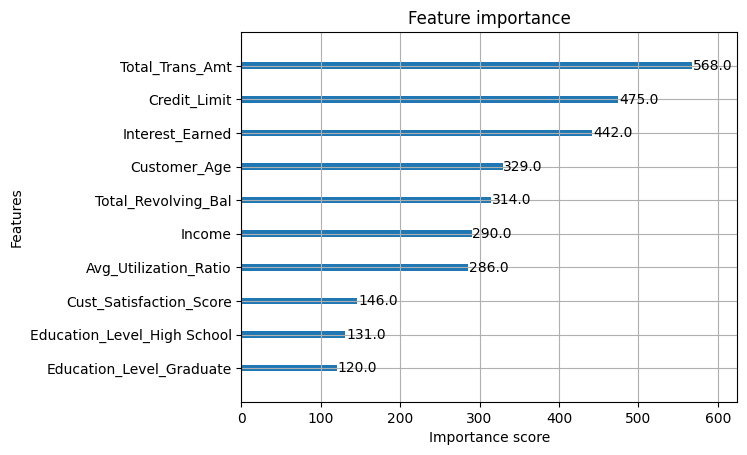

In [34]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(xgb, max_num_features=10)
plt.show()

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/545.1 kB ? eta -:--:--
   ---------------------------------------- 545.1/545.1 kB 2.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.8 MB 3.0 MB/s eta 0:00:01
   ------------------ --------------------- 1.3/2.8 MB 3.7 MB/s eta 0:00:01
   ---------------------- ----------------- 1.6/2.8 MB 3.7 MB/s eta 0:00:01
   --------------------------------- ------ 2.4/2.8 MB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 2.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
   - -------------------------------------- 0.8/30.3 MB 4.9 MB/s eta 0:00:07
   -- ------------------------------------- 1.6/30.3 MB 4.1 MB/s eta 0:00:08
   --- ------------------------------------ 2.4/30.3 MB 4.1 MB/s eta 0:00:07
   ---- -------------

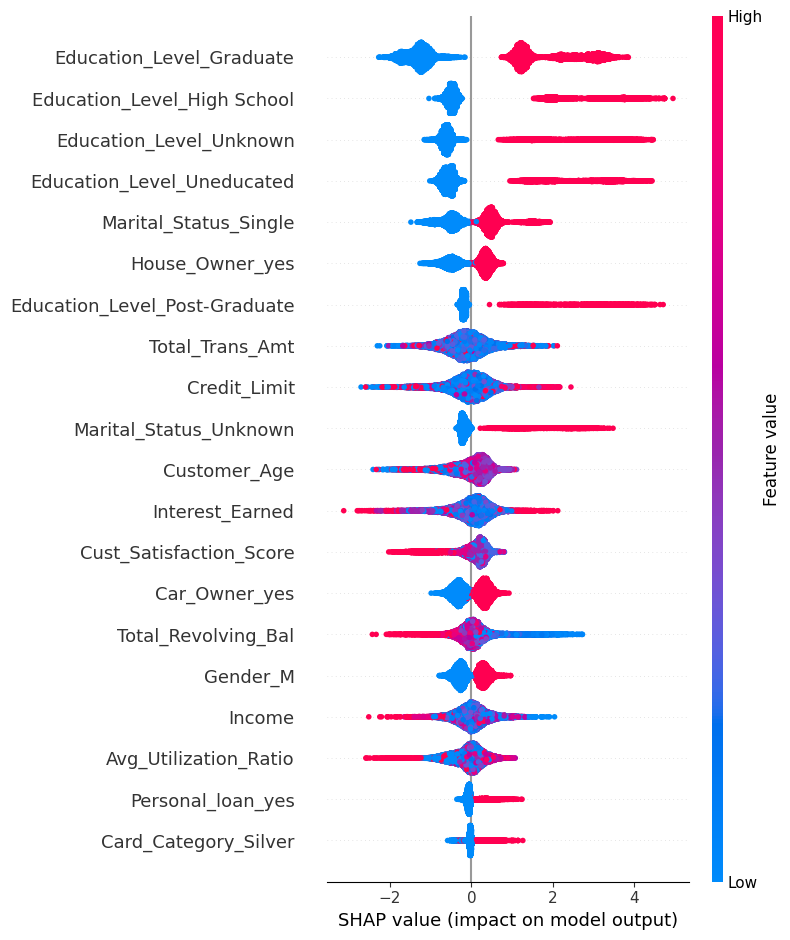

In [37]:
!pip install shap
import shap

explainer = shap.Explainer(xgb)
shap_values = explainer(x_train_sm)

shap.summary_plot(shap_values, x_train_sm)

In [38]:
from sklearn.metrics import precision_recall_curve

y_probs = xgb.predict_proba(x_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)


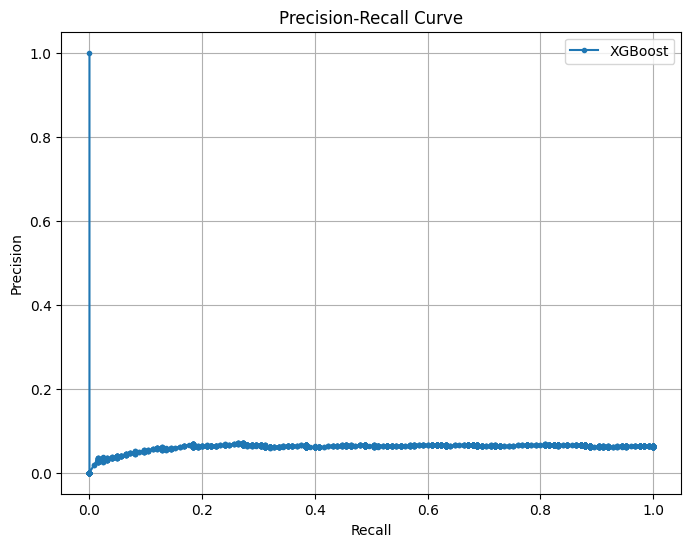

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='XGBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.legend()
plt.show()